# Loading the Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(directory="Face Emotions/refined",
                                            color_mode="rgb",
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(48, 48),
                                            shuffle=True,
                                            seed=42,
                                            validation_split=0.2,
                                            subset="both")

NotFoundError: Could not find directory Face Emotions/refined

# Preprocessing the images

In [49]:
classes_names = train_data.class_names
classes_names

['angry', 'happy', 'neutral', 'sad']

In [50]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


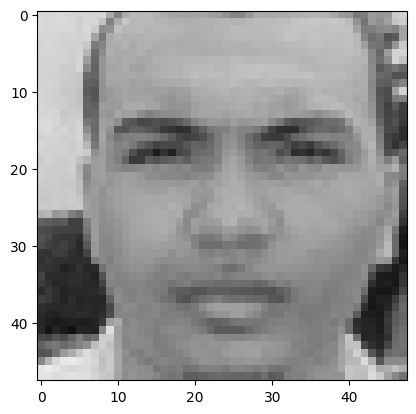

In [21]:
import matplotlib.pyplot as plt
for i in train_data.take(1):
  plt.imshow(i[0][2])
  print(i[1][2])
  plt.show()

# Applying the CNN Model for face Classification

In [22]:
# batch size 64
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(48, 48, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=4, min_lr=0.00001)

In [23]:
# Fit the model
history = model_1.fit(train_data, epochs=100, callbacks=[reduce_lr, checkpoint_callback], validation_data=val_data)

Epoch 1/100
479/479 [==============================] - ETA: 0s - loss: 1.5268 - accuracy: 0.3310
Epoch 1: val_loss improved from inf to 1.58198, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 44s 76ms/step - loss: 1.5268 - accuracy: 0.3310 - val_loss: 1.5820 - val_accuracy: 0.3620 - lr: 0.0010
Epoch 2/100
478/479 [============================>.] - ETA: 0s - loss: 1.3451 - accuracy: 0.3670
Epoch 2: val_loss improved from 1.58198 to 1.35368, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 29s 60ms/step - loss: 1.3452 - accuracy: 0.3668 - val_loss: 1.3537 - val_accuracy: 0.3821 - lr: 0.0010
Epoch 3/100
478/479 [============================>.] - ETA: 0s - loss: 1.3240 - accuracy: 0.3679
Epoch 3: val_loss improved from 1.35368 to 1.33063, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 27s 57ms/step - loss: 1.3240 - accuracy: 0.3679 - val_loss: 1.3306 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 4/100
478/479 [============================>.] - ETA: 0s - loss: 1.2854 - accuracy: 0.3918
Epoch 4: val_loss improved from 1.33063 to 1.21405, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 27s 56ms/step - loss: 1.2852 - accuracy: 0.3917 - val_loss: 1.2141 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/100
478/479 [============================>.] - ETA: 0s - loss: 1.2328 - accuracy: 0.4325
Epoch 5: val_loss did not improve from 1.21405
479/479 [==============================] - 24s 51ms/step - loss: 1.2328 - accuracy: 0.4323 - val_loss: 1.2442 - val_accuracy: 0.4644 - lr: 0.0010
Epoch 6/100
478/479 [============================>.] - ETA: 0s - loss: 1.1882 - accuracy: 0.4618
Epoch 6: val_loss improved from 1.21405 to 1.14696, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 1.1886 - accuracy: 0.4615 - val_loss: 1.1470 - val_accuracy: 0.5012 - lr: 0.0010
Epoch 7/100
479/479 [==============================] - ETA: 0s - loss: 1.1393 - accuracy: 0.4834
Epoch 7: val_loss did not improve from 1.14696
479/479 [==============================] - 24s 51ms/step - loss: 1.1393 - accuracy: 0.4834 - val_loss: 1.2658 - val_accuracy: 0.4401 - lr: 0.0010
Epoch 8/100
478/479 [============================>.] - ETA: 0s - loss: 1.1046 - accuracy: 0.5059
Epoch 8: val_loss improved from 1.14696 to 1.07902, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 1.1047 - accuracy: 0.5059 - val_loss: 1.0790 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 9/100
479/479 [==============================] - ETA: 0s - loss: 1.0654 - accuracy: 0.5267
Epoch 9: val_loss did not improve from 1.07902
479/479 [==============================] - 24s 51ms/step - loss: 1.0654 - accuracy: 0.5267 - val_loss: 1.1921 - val_accuracy: 0.4923 - lr: 0.0010
Epoch 10/100
478/479 [============================>.] - ETA: 0s - loss: 1.0356 - accuracy: 0.5440
Epoch 10: val_loss did not improve from 1.07902
479/479 [==============================] - 24s 51ms/step - loss: 1.0351 - accuracy: 0.5442 - val_loss: 1.2635 - val_accuracy: 0.4307 - lr: 0.0010
Epoch 11/100
479/479 [==============================] - ETA: 0s - loss: 0.9963 - accuracy: 0.5626
Epoch 11: val_loss improved from 1.07902 to 0.90868, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 27s 55ms/step - loss: 0.9963 - accuracy: 0.5626 - val_loss: 0.9087 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 12/100
478/479 [============================>.] - ETA: 0s - loss: 0.9653 - accuracy: 0.5782
Epoch 12: val_loss improved from 0.90868 to 0.87455, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.9661 - accuracy: 0.5778 - val_loss: 0.8746 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 13/100
478/479 [============================>.] - ETA: 0s - loss: 0.9410 - accuracy: 0.5948
Epoch 13: val_loss did not improve from 0.87455
479/479 [==============================] - 24s 51ms/step - loss: 0.9409 - accuracy: 0.5948 - val_loss: 0.9844 - val_accuracy: 0.5873 - lr: 0.0010
Epoch 14/100
479/479 [==============================] - ETA: 0s - loss: 0.9244 - accuracy: 0.6051
Epoch 14: val_loss did not improve from 0.87455
479/479 [==============================] - 24s 50ms/step - loss: 0.9244 - accuracy: 0.6051 - val_loss: 0.8824 - val_accuracy: 0.6382 - lr: 0.0010
Epoch 15/100
479/479 [==============================] - ETA: 0s - loss: 0.9105 - accuracy: 0.6160
Epoch 15: val_loss improved from 0.87455 to 0.83487, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.9105 - accuracy: 0.6160 - val_loss: 0.8349 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 16/100
478/479 [============================>.] - ETA: 0s - loss: 0.8860 - accuracy: 0.6262
Epoch 16: val_loss did not improve from 0.83487
479/479 [==============================] - 24s 51ms/step - loss: 0.8858 - accuracy: 0.6261 - val_loss: 0.8374 - val_accuracy: 0.6531 - lr: 0.0010
Epoch 17/100
478/479 [============================>.] - ETA: 0s - loss: 0.8800 - accuracy: 0.6322
Epoch 17: val_loss did not improve from 0.83487
479/479 [==============================] - 24s 51ms/step - loss: 0.8804 - accuracy: 0.6323 - val_loss: 0.8349 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 18/100
479/479 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.6417
Epoch 18: val_loss did not improve from 0.83487
479/479 [==============================] - 24s 51ms/step - loss: 0.8562 - accuracy: 0.6417 - val_loss: 0.8928 - val_accuracy

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.8302 - accuracy: 0.6613 - val_loss: 0.7743 - val_accuracy: 0.6836 - lr: 0.0010
Epoch 21/100
479/479 [==============================] - ETA: 0s - loss: 0.8166 - accuracy: 0.6587
Epoch 21: val_loss did not improve from 0.77426
479/479 [==============================] - 24s 51ms/step - loss: 0.8166 - accuracy: 0.6587 - val_loss: 0.8753 - val_accuracy: 0.6306 - lr: 0.0010
Epoch 22/100
478/479 [============================>.] - ETA: 0s - loss: 0.7951 - accuracy: 0.6700
Epoch 22: val_loss improved from 0.77426 to 0.74981, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.7953 - accuracy: 0.6699 - val_loss: 0.7498 - val_accuracy: 0.6920 - lr: 0.0010
Epoch 23/100
478/479 [============================>.] - ETA: 0s - loss: 0.7971 - accuracy: 0.6683
Epoch 23: val_loss improved from 0.74981 to 0.74586, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.7970 - accuracy: 0.6683 - val_loss: 0.7459 - val_accuracy: 0.6996 - lr: 0.0010
Epoch 24/100
479/479 [==============================] - ETA: 0s - loss: 0.7894 - accuracy: 0.6708
Epoch 24: val_loss improved from 0.74586 to 0.74185, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 27s 55ms/step - loss: 0.7894 - accuracy: 0.6708 - val_loss: 0.7418 - val_accuracy: 0.7001 - lr: 0.0010
Epoch 25/100
479/479 [==============================] - ETA: 0s - loss: 0.7720 - accuracy: 0.6831
Epoch 25: val_loss did not improve from 0.74185
479/479 [==============================] - 24s 49ms/step - loss: 0.7720 - accuracy: 0.6831 - val_loss: 0.7931 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 26/100
478/479 [============================>.] - ETA: 0s - loss: 0.7694 - accuracy: 0.6859
Epoch 26: val_loss did not improve from 0.74185
479/479 [==============================] - 24s 49ms/step - loss: 0.7696 - accuracy: 0.6859 - val_loss: 0.7785 - val_accuracy: 0.6818 - lr: 0.0010
Epoch 27/100
479/479 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.6894
Epoch 27: val_loss improved from 0.74185 to 0.73625, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.7548 - accuracy: 0.6894 - val_loss: 0.7363 - val_accuracy: 0.7011 - lr: 0.0010
Epoch 28/100
479/479 [==============================] - ETA: 0s - loss: 0.7502 - accuracy: 0.6904
Epoch 28: val_loss improved from 0.73625 to 0.71123, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.7502 - accuracy: 0.6904 - val_loss: 0.7112 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 29/100
479/479 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.7007
Epoch 29: val_loss did not improve from 0.71123
479/479 [==============================] - 24s 49ms/step - loss: 0.7358 - accuracy: 0.7007 - val_loss: 0.7406 - val_accuracy: 0.7045 - lr: 0.0010
Epoch 30/100
478/479 [============================>.] - ETA: 0s - loss: 0.7342 - accuracy: 0.7024
Epoch 30: val_loss improved from 0.71123 to 0.70080, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.7338 - accuracy: 0.7026 - val_loss: 0.7008 - val_accuracy: 0.7165 - lr: 0.0010
Epoch 31/100
479/479 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.7105
Epoch 31: val_loss improved from 0.70080 to 0.69675, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.7152 - accuracy: 0.7105 - val_loss: 0.6968 - val_accuracy: 0.7194 - lr: 0.0010
Epoch 32/100
478/479 [============================>.] - ETA: 0s - loss: 0.7116 - accuracy: 0.7127
Epoch 32: val_loss did not improve from 0.69675
479/479 [==============================] - 24s 49ms/step - loss: 0.7117 - accuracy: 0.7127 - val_loss: 0.7100 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 33/100
478/479 [============================>.] - ETA: 0s - loss: 0.7080 - accuracy: 0.7130
Epoch 33: val_loss improved from 0.69675 to 0.69552, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.7077 - accuracy: 0.7133 - val_loss: 0.6955 - val_accuracy: 0.7215 - lr: 0.0010
Epoch 34/100
479/479 [==============================] - ETA: 0s - loss: 0.6984 - accuracy: 0.7172
Epoch 34: val_loss did not improve from 0.69552
479/479 [==============================] - 24s 50ms/step - loss: 0.6984 - accuracy: 0.7172 - val_loss: 0.7223 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 35/100
478/479 [============================>.] - ETA: 0s - loss: 0.6866 - accuracy: 0.7244
Epoch 35: val_loss did not improve from 0.69552
479/479 [==============================] - 24s 50ms/step - loss: 0.6861 - accuracy: 0.7246 - val_loss: 0.7000 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 36/100
478/479 [============================>.] - ETA: 0s - loss: 0.6926 - accuracy: 0.7153
Epoch 36: val_loss improved from 0.69552 to 0.67756, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.6926 - accuracy: 0.7152 - val_loss: 0.6776 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 37/100
478/479 [============================>.] - ETA: 0s - loss: 0.6705 - accuracy: 0.7329
Epoch 37: val_loss did not improve from 0.67756
479/479 [==============================] - 24s 50ms/step - loss: 0.6704 - accuracy: 0.7329 - val_loss: 0.6903 - val_accuracy: 0.7246 - lr: 0.0010
Epoch 38/100
478/479 [============================>.] - ETA: 0s - loss: 0.6731 - accuracy: 0.7274
Epoch 38: val_loss did not improve from 0.67756
479/479 [==============================] - 24s 50ms/step - loss: 0.6735 - accuracy: 0.7273 - val_loss: 0.7119 - val_accuracy: 0.7121 - lr: 0.0010
Epoch 39/100
479/479 [==============================] - ETA: 0s - loss: 0.6575 - accuracy: 0.7381
Epoch 39: val_loss did not improve from 0.67756
479/479 [==============================] - 24s 50ms/step - loss: 0.6575 - accuracy: 0.7381 - val_loss: 0.6849 - val_accuracy

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.6208 - accuracy: 0.7520 - val_loss: 0.6587 - val_accuracy: 0.7437 - lr: 1.0000e-04
Epoch 42/100
478/479 [============================>.] - ETA: 0s - loss: 0.6054 - accuracy: 0.7584
Epoch 42: val_loss improved from 0.65866 to 0.64703, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.6057 - accuracy: 0.7584 - val_loss: 0.6470 - val_accuracy: 0.7481 - lr: 1.0000e-04
Epoch 43/100
478/479 [============================>.] - ETA: 0s - loss: 0.5939 - accuracy: 0.7631
Epoch 43: val_loss did not improve from 0.64703
479/479 [==============================] - 24s 51ms/step - loss: 0.5934 - accuracy: 0.7634 - val_loss: 0.6478 - val_accuracy: 0.7452 - lr: 1.0000e-04
Epoch 44/100
478/479 [============================>.] - ETA: 0s - loss: 0.5980 - accuracy: 0.7631
Epoch 44: val_loss improved from 0.64703 to 0.64501, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.5983 - accuracy: 0.7631 - val_loss: 0.6450 - val_accuracy: 0.7481 - lr: 1.0000e-04
Epoch 45/100
479/479 [==============================] - ETA: 0s - loss: 0.5903 - accuracy: 0.7610
Epoch 45: val_loss did not improve from 0.64501
479/479 [==============================] - 24s 51ms/step - loss: 0.5903 - accuracy: 0.7610 - val_loss: 0.6470 - val_accuracy: 0.7468 - lr: 1.0000e-04
Epoch 46/100
478/479 [============================>.] - ETA: 0s - loss: 0.5838 - accuracy: 0.7643
Epoch 46: val_loss did not improve from 0.64501
479/479 [==============================] - 24s 51ms/step - loss: 0.5837 - accuracy: 0.7642 - val_loss: 0.6477 - val_accuracy: 0.7473 - lr: 1.0000e-04
Epoch 47/100
478/479 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.7686
Epoch 47: val_loss did not improve from 0.64501
479/479 [==============================] - 24s 50ms/step - loss: 0.5794 - accuracy: 0.7687 - val_loss: 0.6488 - 

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 55ms/step - loss: 0.5660 - accuracy: 0.7747 - val_loss: 0.6447 - val_accuracy: 0.7497 - lr: 1.0000e-05
Epoch 83/100
478/479 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7772
Epoch 83: val_loss improved from 0.64474 to 0.64456, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.5550 - accuracy: 0.7770 - val_loss: 0.6446 - val_accuracy: 0.7494 - lr: 1.0000e-05
Epoch 84/100
479/479 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.7781
Epoch 84: val_loss did not improve from 0.64456
479/479 [==============================] - 24s 50ms/step - loss: 0.5632 - accuracy: 0.7781 - val_loss: 0.6448 - val_accuracy: 0.7494 - lr: 1.0000e-05
Epoch 85/100
479/479 [==============================] - ETA: 0s - loss: 0.5585 - accuracy: 0.7785
Epoch 85: val_loss improved from 0.64456 to 0.64424, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


479/479 [==============================] - 26s 54ms/step - loss: 0.5585 - accuracy: 0.7785 - val_loss: 0.6442 - val_accuracy: 0.7494 - lr: 1.0000e-05
Epoch 86/100
479/479 [==============================] - ETA: 0s - loss: 0.5581 - accuracy: 0.7790
Epoch 86: val_loss did not improve from 0.64424
479/479 [==============================] - 24s 49ms/step - loss: 0.5581 - accuracy: 0.7790 - val_loss: 0.6449 - val_accuracy: 0.7499 - lr: 1.0000e-05
Epoch 87/100
479/479 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.7796
Epoch 87: val_loss did not improve from 0.64424
479/479 [==============================] - 24s 50ms/step - loss: 0.5550 - accuracy: 0.7796 - val_loss: 0.6455 - val_accuracy: 0.7505 - lr: 1.0000e-05
Epoch 88/100
479/479 [==============================] - ETA: 0s - loss: 0.5579 - accuracy: 0.7769
Epoch 88: val_loss did not improve from 0.64424
479/479 [==============================] - 25s 51ms/step - loss: 0.5579 - accuracy: 0.7769 - val_loss: 0.6460 - 

# Model Performanace Evaluation

In [27]:
# Evaluate the model
test_loss, test_accuracy = model_1.evaluate(val_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

120/120 [==============================] - 2s 18ms/step - loss: 0.6457 - accuracy: 0.7499
Test Loss: 0.6457
Test Accuracy: 74.99%


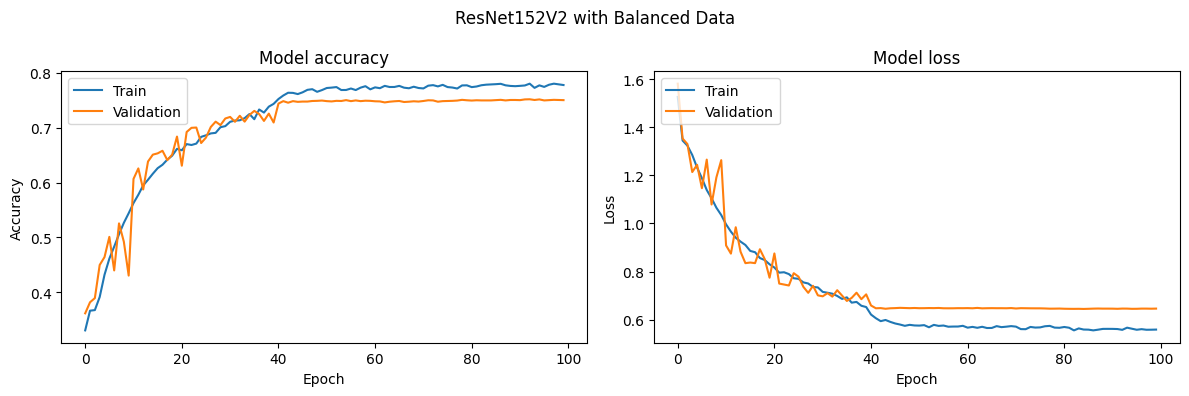

In [28]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.suptitle('ResNet152V2 with Balanced Data')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the figures as image files
plt.tight_layout()
plt.savefig('ResNet152V2_graphs.png')